# Knowledge Graph with Hardcode

TThis notebook introduces how to create a knowledge graph using spaCy and NetworkX. The graph represents key entities and relationships extracted from a short biography of Albert Einstein. It is designed with hardcoded elements and aims to introduce the use of spaCy for entity extraction and NetworkX for graph construction.

## Importing necessary libraries.

In [16]:
import spacy
import networkx as nx
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Loading and processing text with spaCy

In [24]:
# Load the spaCy English language model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Text to analyze
text = """
    Born in the German Empire, Einstein moved to Switzerland in 1895, 
    and at the age of seventeen he enrolled in the mathematics and physics teaching diploma program at the Swiss federal polytechnic school. 
    In 1903, he secured a permanent position at the Swiss Patent Office.
"""

# Process the text with spaCy
doc = nlp(text)

## Creating and populating a NetworkX graph with entities and relationships

In [21]:
# Create a networkx graph
G = nx.DiGraph()

# Add the main entity (Einstein) to the graph
G.add_node("Einstein", type="Person")

# Extract and add entities and relationships
for ent in doc.ents:
    # Add entity nodes        
    G.add_node(ent.text, type=ent.label_)
    
    # Add edges between Einstein and other entities
    if ent.text != "Einstein":
        G.add_edge("Einstein", ent.text, relation=f"related_to_{ent.label_}")

# Add some specific relationships based on the text
G.add_edge("Einstein", "German Empire", relation="born_in")
G.add_edge("Einstein", "Switzerland", relation="moved_to")
G.add_edge("Einstein", "Swiss federal polytechnic school", relation="enrolled_in")
G.add_edge("Einstein", "Swiss Patent Office", relation="worked_at") 

## Visualizing the graph using Matplotlib

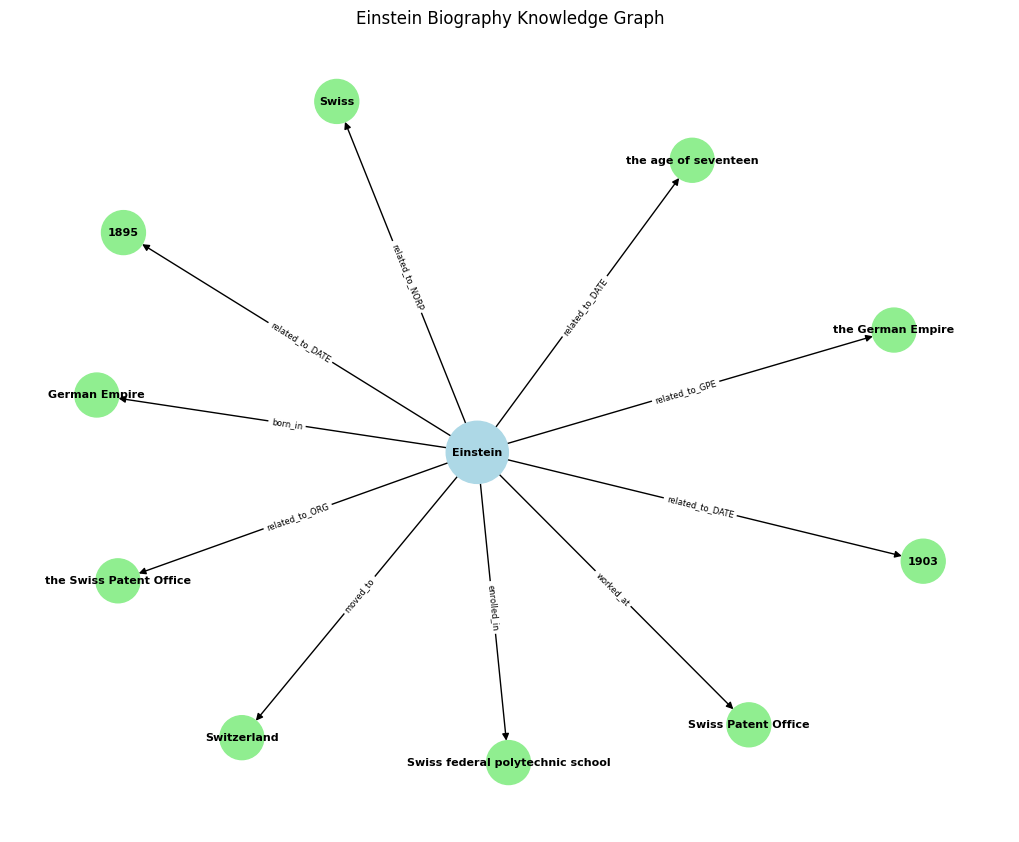

Nodes: [('Einstein', {'type': 'PERSON'}), ('the German Empire', {'type': 'GPE'}), ('Switzerland', {'type': 'GPE'}), ('1895', {'type': 'DATE'}), ('the age of seventeen', {'type': 'DATE'}), ('Swiss', {'type': 'NORP'}), ('1903', {'type': 'DATE'}), ('the Swiss Patent Office', {'type': 'ORG'}), ('German Empire', {}), ('Swiss federal polytechnic school', {}), ('Swiss Patent Office', {})]

Edges: [('Einstein', 'the German Empire', {'relation': 'related_to_GPE'}), ('Einstein', 'Switzerland', {'relation': 'moved_to'}), ('Einstein', '1895', {'relation': 'related_to_DATE'}), ('Einstein', 'the age of seventeen', {'relation': 'related_to_DATE'}), ('Einstein', 'Swiss', {'relation': 'related_to_NORP'}), ('Einstein', '1903', {'relation': 'related_to_DATE'}), ('Einstein', 'the Swiss Patent Office', {'relation': 'related_to_ORG'}), ('Einstein', 'German Empire', {'relation': 'born_in'}), ('Einstein', 'Swiss federal polytechnic school', {'relation': 'enrolled_in'}), ('Einstein', 'Swiss Patent Office', {'r

In [22]:
# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
node_colors = ['lightblue' if node == "Einstein" else 'lightgreen' for node in G.nodes()]
node_sizes = [2000 if node == "Einstein" else 1000 for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, 
        node_size=node_sizes, font_size=8, 
        font_weight="bold", arrows=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Einstein Biography Knowledge Graph")
plt.tight_layout()
plt.show()

# Print out the graph details
print("Nodes:", list(G.nodes(data=True)))
print("\nEdges:", list(G.edges(data=True)))

## Notes
we know the basic concepts of building a knowledge graph using spaCy and NetworkX. In this notebook, the main node (Einstein) is hardcoded, and a few nodes such as "German Empire", "Switzerland", "Swiss federal polytechnic school" and "Swiss Patent Office" are also added manually. This approach is useful for understanding the fundamentals, but for a more dynamic and scalable knowledge graph construction, refer to the notebook `kg_dynamic.ipynb` for detailed implementation.